In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [3]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from eppy.bunch_subclass import EpBunch

from helpers.ep_helpers import PARTNER
from helpers.variable_interfaces import all_variables as vars
from setup.materials_setup import retrieve_cases
from setup.data_wrangle2 import *
from analysis.helpers import map_zone_names, extract_times
from analysis.plot_helpers import set_axis_ticks
# from analysis.dataframes import *
# from analysis.volumes import *

from analysis.plot_subsurfaces import *
from analysis.plot_helpers import plot_zone_domains

sns.set_style("darkgrid")

In [4]:
cases = retrieve_cases()

In [5]:
medium_cases = [i for i in cases if "Medium" in i.case_name]
[case] = [i for i in medium_cases if "bol" in i.case_name]
case

CaseData(case_name='Medium_case_bol_5', idf=<geomeppy.idf.IDF object at 0x11cdb4eb0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_bol_5/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_bol_5'))

SubsurfaceLocation(axis=1, location_in_other_axis=4.32) y
SubsurfaceLocation(axis=0, location_in_other_axis=1.77) x
SubsurfaceLocation(axis=1, location_in_other_axis=2.11) y
SubsurfaceLocation(axis=1, location_in_other_axis=2.11) y
SubsurfaceLocation(axis=1, location_in_other_axis=4.32) y
SubsurfaceLocation(axis=0, location_in_other_axis=5.25) x
SubsurfaceLocation(axis=1, location_in_other_axis=6.44) y
SubsurfaceLocation(axis=0, location_in_other_axis=0.0) x
SubsurfaceLocation(axis=0, location_in_other_axis=0.0) x
SubsurfaceLocation(axis=1, location_in_other_axis=6.44) y
SubsurfaceLocation(axis=1, location_in_other_axis=0.0) y
SubsurfaceLocation(axis=1, location_in_other_axis=0.0) y


<Axes: >

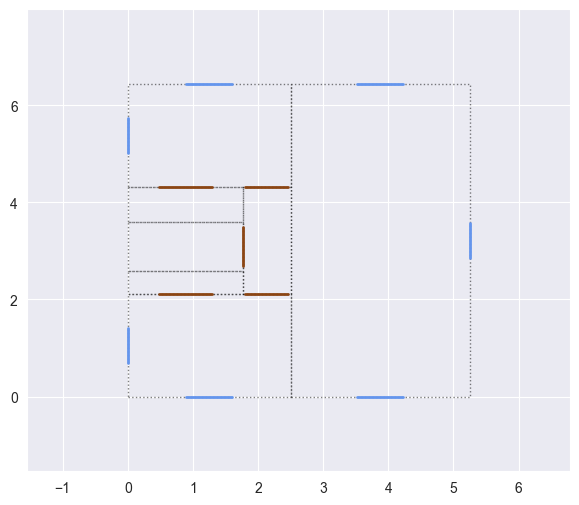

In [24]:
fig, ax = plt.subplots(nrows=1, figsize=(7, 6))
ax = plot_zone_domains(case.idf, ax)
ax = plot_subsurfaces(case.idf, ax)
ax

In [8]:
ax = plot_subsurfaces(case, ax)
ax

SubsurfaceLocation(axis=1, location_in_other_axis=4.32) y
SubsurfaceLocation(axis=0, location_in_other_axis=1.77) x
SubsurfaceLocation(axis=1, location_in_other_axis=2.11) y
SubsurfaceLocation(axis=1, location_in_other_axis=2.11) y
SubsurfaceLocation(axis=1, location_in_other_axis=4.32) y


<Axes: >

In [15]:
from helpers.ep_helpers import get_object_type


[get_object_type(i) for i in case.idf.getsubsurfaces()]

['Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Door:Interzone',
 'Window',
 'Window',
 'Window',
 'Window',
 'Window',
 'Window',
 'Window']

In [16]:
def get_original_subsurfaces(idf):
    return [i for i in idf.getsubsurfaces() if PARTNER not in i.Name]

In [17]:
get_original_subsurfaces(case.idf)

[
 DOOR:INTERZONE,
     Block 06 Storey 0 Wall 0002_1 Door,    !- Name
     Medium Furnishings,       !- Construction Name
     Block 06 Storey 0 Wall 0002_1,    !- Building Surface Name
     Block 06 Storey 0 Wall 0002_1 Door Partner,    !- Outside Boundary Condition Object
     1.0,                      !- Multiplier
     3.650000e-02,             !- Starting X Coordinate
     3.050000e-02,             !- Starting Z Coordinate
     0.6570000004023314,       !- Length
     2.744999999832362;        !- Height,
 
 DOOR:INTERZONE,
     Block 03 Storey 0 Wall 0001_1 Door,    !- Name
     Medium Furnishings,       !- Construction Name
     Block 03 Storey 0 Wall 0001_1,    !- Building Surface Name
     Block 03 Storey 0 Wall 0001_1 Door Partner,    !- Outside Boundary Condition Object
     1.0,                      !- Multiplier
     1.000000e-01,             !- Starting X Coordinate
     3.050000e-02,             !- Starting Z Coordinate
     0.81,                     !- Length
     2.03;